In [1]:
#Import the required library pandas:
import pandas as pd


In [2]:
#Load the dataset:
data_pf = pd.read_excel("Pass_Fail.xlsx",sheet_name=0)
data_pf

,Name,Marks,Result
0,Ajibola,22,P
1,Shohini,15,F
2,Nishant,23,P
3,Priyanka,17,F
4,Kunal,25,P
5,Leenish,14,F


In [3]:
data = data_pf.iloc[:,[1,2]]
data

,Marks,Result
0,22,P
1,15,F
2,23,P
3,17,F
4,25,P
5,14,F


In [5]:
#Split the train and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data[['Marks']],data[['Result']]) # 30%

In [6]:
X_train

,Marks
3,17
4,25
1,15
5,14


In [7]:
y_train

,Result
3,F
4,P
1,F
5,F


In [8]:
X_test

,Marks
0,22
2,23


In [9]:
y_test

,Result
0,P
2,P


In [10]:
#Build the Logistic Rgression Model:
from sklearn.linear_model import LogisticRegression
Model = LogisticRegression()

In [ ]:
help(LogisticRegression)

Help on class LogisticRegression in module sklearn.linear_model._logistic:

class LogisticRegression(sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin, sklearn.base.BaseEstimator)
 |  LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
 |  
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the
 |  cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag', 'saga' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', 's

In [11]:
#Start Building the Model:
Model.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [12]:
#Predcit for the y_train:
y_train_pred = Model.predict(X_train)

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
confusion_matrix = confusion_matrix(y_train_pred,y_train)
confusion_matrix

array([[3, 0],
       [0, 1]])

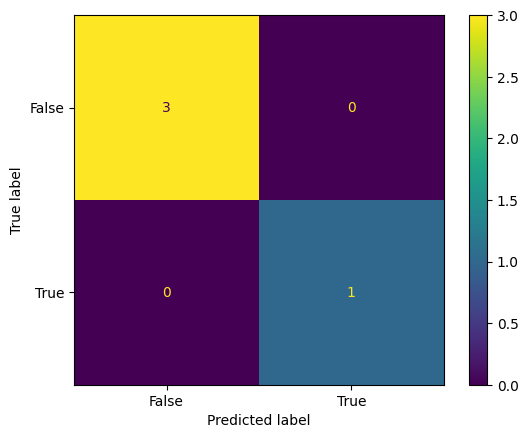

In [14]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [15]:
y_train

,Result
3,F
4,P
1,F
5,F


In [16]:
#Predict for the y_test:
y_pred = Model.predict(X_test)
y_pred

array(['P', 'P'], dtype=object)

In [17]:
y_test

,Result
0,P
2,P


# **Accuracy**

we get accuracy by answering this question " out of the predictions made by the model , what percentage is correct ? "

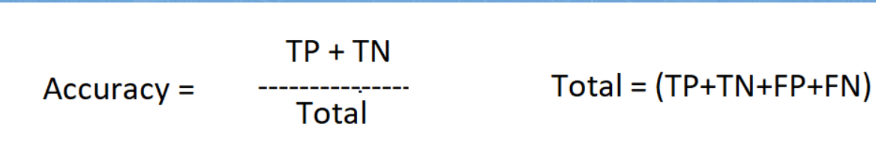

# **Precision**

Precision   ----> metric that tells us about quality of positive predictions

we get precision by answering tis question " **out of all the YES predictions made by the model , how many of them were correct ?** "

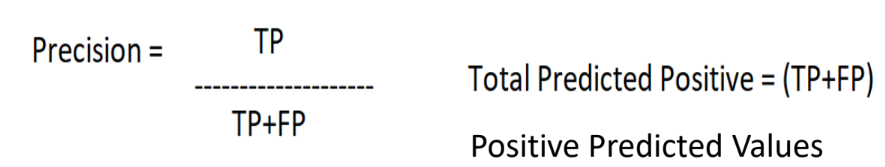

# **Recall / Specificity**

it aims to answer this question : " **how good was the model at predicting real NO events**"

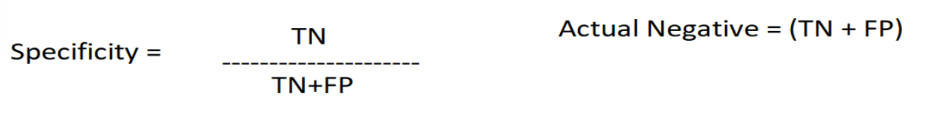

# **Recall / Sensitivity**

Recall / Sensitivity  ---->   tells us about how well the model identifies true positivies

it aims to answer this question : " **how good was the model at predicting real YES events** which can be considered as the flip of the precision."

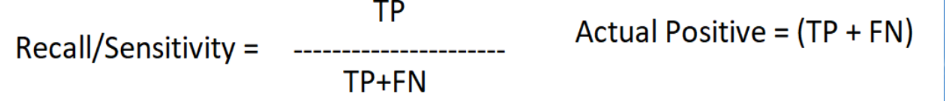

# **F1 Score**

The harmonic mean of a and b is 2ab/(a+b).

it corresponds to the harmonic mean of the precision and recall

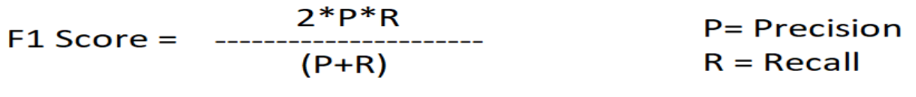

In [18]:
#Check the Metrics:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test),'\n')

              precision    recall  f1-score   support

           P       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2
 



Unique values in y_test: ['P']
Unique values in y_pred: ['P']


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


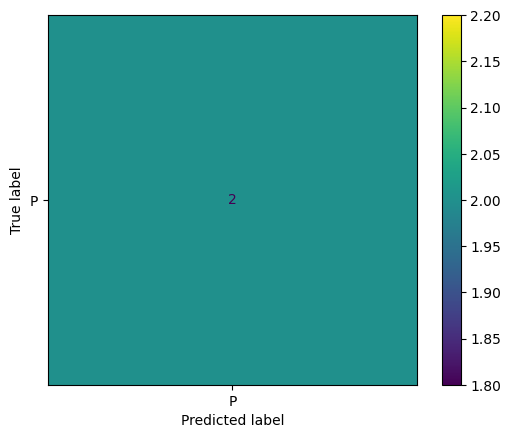

In [21]:
#Check the Metrics:
from sklearn.metrics import classification_report
import numpy as np

# Check the unique values in y_test and y_pred
print("Unique values in y_test:", np.unique(y_test))
print("Unique values in y_pred:", np.unique(y_pred))

# Only print classification report if both have more than one unique value
if len(np.unique(y_test)) > 1 and len(np.unique(y_pred)) > 1:
    print(classification_report(y_pred,y_test),'\n')
else:
    print("Warning: y_test or y_pred has only one unique value. Classification report cannot be calculated.")



from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
confusion_matrix= confusion_matrix(y_pred,y_test)

# Extract labels from y_test and y_pred if they have more than one unique value
if len(np.unique(y_test)) > 1 and len(np.unique(y_pred)) > 1:
    labels = np.unique(np.concatenate((y_test, y_pred)))
else:
    # If only one unique value, use that as the label
    labels = np.unique(y_test)

cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = labels)

cm_display.plot()
plt.show()

In [24]:
Model.predict([[50]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['P'], dtype=object)

In [25]:
Model.predict([[5]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['F'], dtype=object)

# Task on Confusion Matrix

In [ ]:
actual = [1,0,0,1,0,0,1,0,0,0]
predicted = [0,0,0,0,0,0,1,1,1,1]

In [ ]:
len(actual),len(predicted)

(10, 10)